In [1]:
#Load Nescessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime

### Data Pre Processing

In [2]:
#Import Historical Eth Prices

eth_ts = pd.read_csv('ETH.csv')

In [3]:
#Create Date Time Index out of Unix Epoch Time Format

eth_ts['time'] = pd.to_datetime(eth_ts['time'], unit='s')

eth_ts.set_index('time', inplace=True)

#Preview Results

eth_ts.head()

,open,high,low,close,Volume,Volume MA,Plot,Plot.1,Plot.2,52 Week High,...,Plot.5,Plot.6,Plot.7,Plot.8,EMA Divergence,Min,Max,-Min,-Max,Plot.9
time,,,,,,,,,,,,,,,,,,,,,
2019-10-10,193.26,194.85,187.29,191.79,86674.15560,108015.394811,0,NaN,NaN,NaN,...,NaN,210.87390,206.5159,182.802370,NaN,1.75,3.5,NaN,NaN,191.79
2019-10-11,191.86,197.93,179.23,180.84,121748.85811,110812.895238,0,NaN,NaN,NaN,...,NaN,211.11305,205.3064,182.615478,NaN,1.75,3.5,NaN,NaN,180.84
2019-10-12,180.94,184.87,177.27,179.86,57840.91643,110464.225637,0,NaN,NaN,NaN,...,NaN,211.34595,204.2770,182.353051,NaN,1.75,3.5,NaN,NaN,179.86
2019-10-13,179.76,184.75,178.63,181.18,51204.18219,108389.184075,0,NaN,NaN,NaN,...,NaN,211.55645,203.2088,182.241332,NaN,1.75,3.5,NaN,NaN,181.18
2019-10-14,181.12,187.91,180.52,186.85,60870.12963,91161.342433,0,NaN,NaN,NaN,...,NaN,211.80340,202.2016,182.680253,NaN,1.75,3.5,NaN,NaN,186.85


### Time Series Preview and Analysis

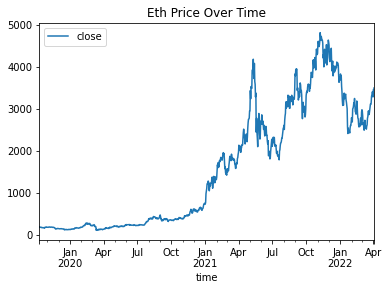

In [4]:
#Quick Preview of Time Series

eth_ts[['close']].plot()
plt.title('Eth Price Over Time');

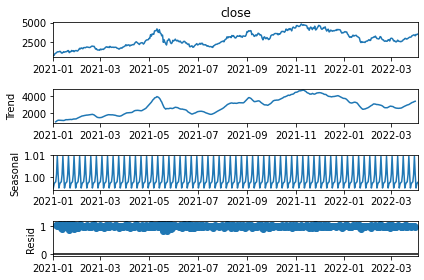

In [5]:
#Decompose Time Series 2021 onwards

eth_2021_onwards = eth_ts['2021':]

result = seasonal_decompose(eth_2021_onwards['close'], model='multiplicative')

result.plot();

### Create RNN

In [51]:
#Establish Train & Test Sets

eth_close_ts = eth_ts[['close']]

X_train = eth_close_ts[:-14]
y_train = eth_close_ts[-14:-7]
y_test = eth_close_ts[-7:]

In [52]:
#Scale Data for RNN

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
y_train_scaled = scaler.transform(y_train)

In [53]:
#Shape the Train Data

n_input = 7
n_features = 1
generator = TimeseriesGenerator(X_train_scaled, X_train_scaled, length=n_input, batch_size=1)

### Actual Modelling

In [9]:
#Construct 3 Layer Neural Network

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2022-04-07 07:09:21.848719: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#Ascertain Model Summmary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
#fit model

model.fit(generator, epochs=100)

2022-04-07 07:09:37.932461: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
886/886 [==============================] - 4s 3ms/step - loss: 0.0066
Epoch 2/100
886/886 [==============================] - 3s 4ms/step - loss: 0.0030
Epoch 3/100
886/886 [==============================] - 3s 4ms/step - loss: 0.0019
Epoch 4/100
886/886 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 5/100
886/886 [==============================] - 3s 3ms/step - loss: 0.0017
Epoch 6/100
886/886 [==============================] - 3s 3ms/step - loss: 0.0013
Epoch 7/100
886/886 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 8/100
886/886 [==============================] - 3s 4ms/step - loss: 0.0011
Epoch 9/100
886/886 [==============================] - 3s 3ms/step - loss: 9.9810e-04
Epoch 10/100
886/886 [==============================] - 3s 3ms/step - loss: 9.6078e-04
Epoch 11/100
886/886 [==============================] - 3s 3ms/step - loss: 8.7943e-04
Epoch 12/100
886/886 [==============================] - 3s 3ms/step - loss: 8.1216e-

886/886 [==============================] - 3s 3ms/step - loss: 6.2197e-04
Epoch 96/100
886/886 [==============================] - 3s 3ms/step - loss: 6.1549e-04
Epoch 97/100
886/886 [==============================] - 3s 3ms/step - loss: 5.8630e-04
Epoch 98/100
886/886 [==============================] - 3s 3ms/step - loss: 5.7785e-04
Epoch 99/100
886/886 [==============================] - 3s 3ms/step - loss: 5.8846e-04
Epoch 100/100
886/886 [==============================] - 3s 3ms/step - loss: 6.1475e-04


Text(0.5, 1.0, 'Loss Per Epoch')

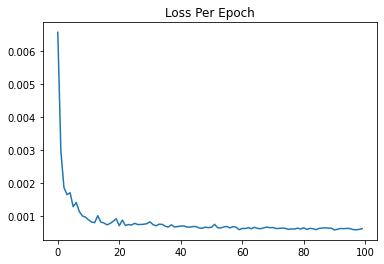

In [12]:
#Plot Epoch Loss

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss Per Epoch')

In [13]:
#Ascertain Multiple Models

def create_model(n_input, n_features, epochs):
    
        #Construct 3 Layer Neural Network

        model = Sequential()
        model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
        model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        #fit model

        model.fit(generator, epochs=epochs, verbose=0)

        #Getting Predictions

        test_predictions = []

        first_eval_batch = X_train_scaled[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))

        for i in range(len(y_train_scaled)):

            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]

            # append the prediction into the array
            test_predictions.append(current_pred) 

            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

        #Inverse Transforming Preds into Timeseries Data:

        preds = scaler.inverse_transform(test_predictions)
        
        #Create
        
        pred_df = y_train

        pred_df['Predictions'] = preds

        mse = mean_squared_error(y_train['close'], y_train['Predictions'])

        rmse = math.sqrt(mse)

        #Save Model 

        return model, mse, rmse, pred_df

In [40]:
best_models = []

for run in range(1,21,1):
    #Create RNN
    
    model_package = create_model(7, 1, 40)
    
    #Isolate Results
    
    model = model_package[0]
    mse = model_package[1]
    rmse = model_package[2]
    
    #Save Model To Folder
    
    model.save(f'Models/Model {run}.h5')
    
    #Store Model Results in List
    
    best_models.append([run, mse, rmse])

/Users/angelogayanelo/opt/anaconda3/envs/phase4/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/angelogayanelo/opt/anaconda3/envs/phase4/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/angelogayanelo/opt/anaconda3/envs/phase4/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a

In [41]:
#Create Best Models Data Frame

best_models_df = pd.DataFrame(best_models)
best_models_df.columns=['MODEL', 'MSE', 'RMSE']

#Ascertain top 3 Models

best_models_df.sort_values(by='RMSE', inplace=True)

top_3_models = best_models_df.head(3)

#Preview Top 3 Models

top_3_models

,MODEL,MSE,RMSE
14,15,1281.701869,35.800864
8,9,1511.501757,38.878037
18,19,1830.710305,42.786801


In [96]:
X_train[-7:]

,close
time,
2022-03-14,2590.23
2022-03-15,2619.15
2022-03-16,2774.89
2022-03-17,2814.67
2022-03-18,2939.17
2022-03-19,2952.16
2022-03-20,2862.44


In [81]:
def get_model_package(run, forecast_start, n_input):
    
    #Retrieve Model for Models Folder
    
    model = keras.models.load_model(f"Models/Model {run}.h5")
    
    #Getting Predictions

    test_predictions = []

    first_eval_batch = X_train_scaled[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(eth_ts[['close']][forecast_start:])):

        # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    #Inverse Transforming Preds into Timeseries Data:

    preds = scaler.inverse_transform(test_predictions)

    #Create Model Package

    pred_df = eth_ts[['close']][forecast_start:]
    pred_df['Predictions'] = preds
    actuals = eth_ts[['close']][forecast_start:].head(7)
    actuals_vs = actuals.merge(pred_df[['Predictions']], how='left', left_index=True, right_index=True)
    mse = mean_squared_error(actuals_vs['close'], actuals_vs['Predictions'])
    rmse = math.sqrt(mse)
    
    return pred_df, mse, rmse

In [93]:
get_model_package(19, '2022-03-21', 7)[0]

,close,Predictions
time,,
2022-03-21,2891.08,2925.856859
2022-03-22,2970.51,2976.799217
2022-03-23,3038.93,3022.232953
2022-03-24,3112.52,3069.582110
2022-03-25,3104.15,3115.728209
2022-03-26,3146.22,3159.506864
2022-03-27,3296.29,3200.723591
2022-03-28,3334.47,3240.809841
2022-03-29,3401.71,3279.652678


In [265]:
#Aggregate Predictions 

forecast_start = '2022-03-21'
validation_df = eth_ts[['close']][forecast_start:]
validation_df.columns=['ACTUALS']

for model in list(top_3_models['MODEL']):
    model_package = get_model_package(model, forecast_start, 7)
    preds = model_package[0]['Predictions']
    validation_df[f'MODEL {model} PREDS'] = preds
    
    test_rmse = math.sqrt(mean_squared_error(validation_df['ACTUALS']['2022-03-28':], 
                             validation_df[f'MODEL {model} PREDS']['2022-03-28':]))
    
    print(f'MODEL {model} TEST RMSE: {round(test_rmse)}')
                  
validation_df

MODEL 15 TEST RMSE: 201
MODEL 9 TEST RMSE: 79
MODEL 19 TEST RMSE: 77


,ACTUALS,MODEL 15 PREDS,MODEL 9 PREDS,MODEL 19 PREDS
time,,,,
2022-03-21,2891.08,2920.640243,2925.247903,2925.856859
2022-03-22,2970.51,2971.128618,2971.535802,2976.799217
2022-03-23,3038.93,3024.920988,3017.177474,3022.232953
2022-03-24,3112.52,3086.271637,3066.187597,3069.582110
2022-03-25,3104.15,3150.420734,3116.690264,3115.728209
2022-03-26,3146.22,3216.195767,3167.384612,3159.506864
2022-03-27,3296.29,3283.064846,3217.632823,3200.723591
2022-03-28,3334.47,3351.522310,3268.218440,3240.809841
2022-03-29,3401.71,3421.359661,3319.014795,3279.652678


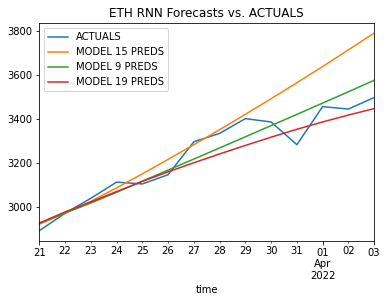

In [266]:
#Plot Results of RNN Models

validation_df.plot()
plt.title('ETH RNN Forecasts vs. ACTUALS');

In [319]:
def get_updated_forecast(run, current_date, n_input):
    
    #Establish hypothetical current period:
    
    current_period = eth_ts[['close']][:current_date]
    
    #Scale Data for RNN

    current_scaler = MinMaxScaler()

    current_scaler.fit(pred_period)

    current_period_scaled = current_scaler.transform(current_period)
    
    #Ascertain Actuals Start Date

    forecast_start = current_period[-1:].reset_index()['time']  + datetime.timedelta(days=1)

    actuals_start_date = str(forecast_start.iloc[0])

    #Etablish Actuals DF

    actuals_df = eth_ts[['close']][actuals_start_date:]
    
    #Load Model:

    model = keras.models.load_model(f"Models/Model {run}.h5")

    #Getting Predictions

    test_predictions = []

    first_eval_batch = current_period_scaled[-7:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(1, n_input + 1, 1):

        # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    #Inverse Transforming Preds into Timeseries Data:

    preds = scaler.inverse_transform(test_predictions)

    #Create Model Package

    pred_df = actuals_df[:7]
    pred_df['Predictions'] = preds
    
    #Get Metrics

    mse = mean_squared_error(pred_df['close'], pred_df['Predictions'])
    rmse = math.sqrt(mse)
    
    #Get Relevant Actuals
    
    eow_date = pd.to_datetime(current_date) + datetime.timedelta(days=7)
    actual_current_value = eth_ts[current_date:current_date]['close'].iloc[0]
    actual_eow_value = eth_ts[eow_date:eow_date]['close'].iloc[0]
    actual_eow_gain = (actual_eow_value - actual_current_value) / actual_current_value
    
    #Get Relevant Predictions
    
    pred_max_value = pred_df['Predictions'].max()
    pred_min_value = pred_df['Predictions'].min()
    pred_eow_value = pred_df['Predictions'][-1:].iloc[0]
    pred_eow_gain = (pred_eow_value - actual_current_value) / actual_current_value
    
    #Establish Trade Strategy Metrics
    
    stop_loss = pred_min_value - rmse + 1
    max_gain = pred_max_value - rmse - 1

    
    return pred_df, rmse, actual_current_value, actual_eow_value, actual_eow_gain, pred_eow_value, pred_eow_gain, stop_loss, max_gain

In [321]:
#Simulate a Period

date_list = [pd.to_datetime('2022-01-02')]

for item in range(0,12,1):
    date_list.append((date_list[item]) + datetime.timedelta(weeks=1))

In [322]:
sim_results = []

for date in date_list:
    
    #Extract Model Package
    
    sim_model_package = get_updated_forecast(19, str(date), 7)
    rmse = sim_model_package[1]
    actual_current_value = sim_model_package[2]
    actual_eow_value = sim_model_package[3]
    actual_eow_gain = sim_model_package[4]
    pred_eow_value = sim_model_package[5]
    pred_eow_gain = sim_model_package[6]
    stop_loss = sim_model_package[7]
    max_gain = sim_model_package[8]
    

    
    #Send Sim Results to List
    
    sim_results.append([rmse, actual_current_value, actual_eow_value, actual_eow_gain, 
                        pred_eow_value, pred_eow_gain, stop_loss, max_gain])

#Create Sim Results DF
    
sim_results_df = pd.DataFrame(sim_results)
sim_results_df.columns=['rmse', 'actual_current_value', 'actual_eow_value', 'actual_eow_gain', 
                        'pred_eow_value', 'pred_eow_gain', 'stop_loss', 'max_gain']


sim_results_df['date'] = date_list
sim_results_df.set_index('date', inplace=True)

/Users/angelogayanelo/opt/anaconda3/envs/phase4/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/angelogayanelo/opt/anaconda3/envs/phase4/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/angelogayanelo/opt/anaconda3/envs/phase4/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a

In [328]:
sim_results_df

,rmse,actual_current_value,actual_eow_value,actual_eow_gain,pred_eow_value,pred_eow_gain,stop_loss,max_gain,execute_trade
date,,,,,,,,,
2022-01-02,487.987849,3828.87,3151.66,-0.176869,3830.617505,0.000456,3334.935577,3341.629656,No
2022-01-09,79.557432,3151.66,3349.46,0.062761,3430.341263,0.088424,3124.232628,3349.783831,Yes
2022-01-16,716.918960,3349.46,2541.19,-0.241314,3550.380587,0.059986,2670.085135,2832.461627,No
2022-01-23,247.199344,2541.19,2602.89,0.024280,2906.979521,0.143944,2333.896096,2658.780177,No
2022-01-30,90.490233,2602.89,3058.22,0.174932,2981.828354,0.145584,2577.820627,2890.338121,Yes
2022-02-06,266.249750,3058.22,2872.84,-0.060617,3336.345784,0.090944,2835.651389,3069.096034,No
2022-02-13,321.437190,2872.84,2622.47,-0.087151,3213.782925,0.118678,2612.440451,2891.345735,No
2022-02-20,231.315985,2622.47,2618.01,-0.001701,3016.456144,0.150235,2468.720809,2784.140159,No
2022-02-27,268.133746,2618.01,2550.77,-0.025684,3010.827860,0.150044,2432.292017,2741.694114,No


In [336]:
rmse_go = []

for item in sim_results_df['rmse']:
    if item < 100:
        rmse_go.append(0)
    else:
        rmse_go.append(1)

gain_go = []

for item in sim_results_df['pred_eow_gain']:
    if pred_eow_gain > 0.05:
        gain_go.append(0)
    else:
        gain_go.append(1)

buy = []

sim_results_df['RMSE Below 100'] = rmse_go
sim_results_df['Gain Confirmed'] = gain_go
sim_results_df['Buy'] = sim_results_df['RMSE Below 100'] + sim_results_df['Gain Confirmed']

sim_results_df[(sim_results_df['Buy'] == 0)]

,rmse,actual_current_value,actual_eow_value,actual_eow_gain,pred_eow_value,pred_eow_gain,stop_loss,max_gain,execute_trade,RMSE Below 100,Gain Confirmed,Buy
date,,,,,,,,,,,,
2022-01-09,79.557432,3151.66,3349.46,0.062761,3430.341263,0.088424,3124.232628,3349.783831,Yes,0,0,0
2022-01-30,90.490233,2602.89,3058.22,0.174932,2981.828354,0.145584,2577.820627,2890.338121,Yes,0,0,0
2022-03-13,71.592857,2516.41,2862.44,0.137509,2915.199999,0.158476,2516.413232,2842.607142,Yes,0,0,0
2022-03-20,42.786801,2862.44,3296.29,0.151566,3200.723591,0.118180,2884.070058,3156.936790,Yes,0,0,0
2022-03-27,53.842941,3296.29,3498.01,0.061196,3493.612658,0.059862,3266.072650,3438.769716,Yes,0,0,0
